Margem de Ganho: 4.71 dB
Margem de Fase: 56.87 graus
Frequência de Cruzamento de Ganho: 2.00 rad/s
Frequência de Cruzamento de Fase: 0.62 rad/s


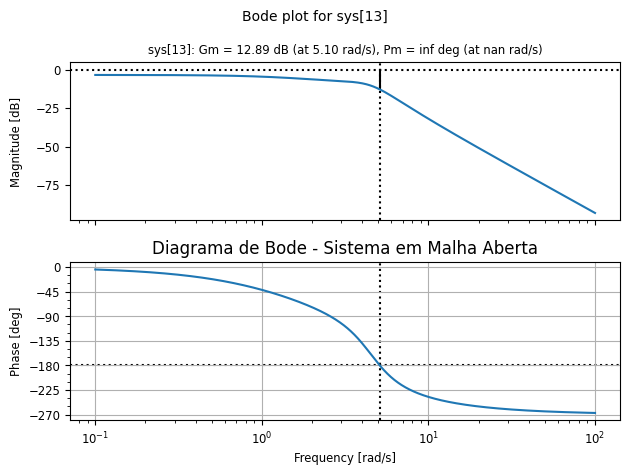

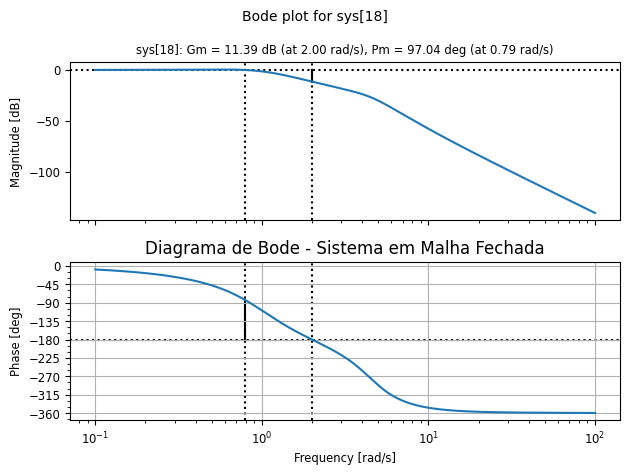

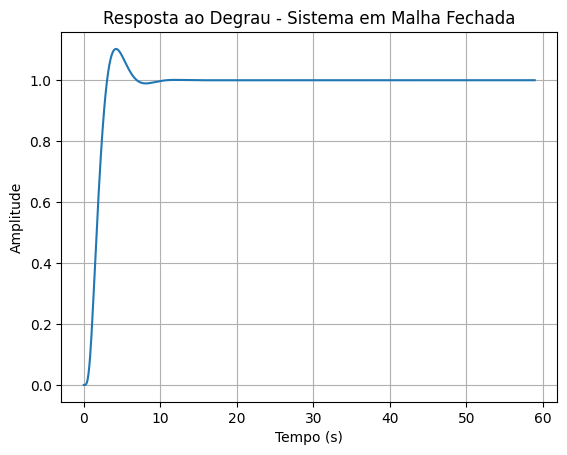

In [2]:
import numpy as np
import control
import matplotlib.pyplot as plt

# Função de transferência original
num = [22, 0]
den = [1, 5, 26, 33]
G = control.tf(num, den)

# Adicionando um integrador
G1 = control.tf(G.num[0][0], np.polymul(G.den[0][0], [1, 0]))

# Parâmetros do controlador de avanço de fase
alpha = 0.4328
T = 0.3028

# Controlador de avanço de fase
num_c = [alpha*T, 1]
den_c = [T, 1]
C = control.tf(num_c, den_c)

# Controlador final (avanço de fase + integrador)
C_final = control.tf(C.num[0][0], np.polymul(C.den[0][0], [1, 0]))

# Sistema em malha fechada
sys_cl = control.feedback(C_final*G1, 1)

# Calcular a margem de ganho e a margem de fase
gm, pm, wg, wp = control.margin(C_final*G1)

print(f"Margem de Ganho: {gm:.2f} dB")
print(f"Margem de Fase: {pm:.2f} graus")
print(f"Frequência de Cruzamento de Ganho: {wg:.2f} rad/s")
print(f"Frequência de Cruzamento de Fase: {wp:.2f} rad/s")

# Plotar o diagrama de Bode do sistema em malha aberta
plt.figure()
control.bode(G1, dB=True, margins=True)
plt.title('Diagrama de Bode - Sistema em Malha Aberta')
plt.grid(True)
plt.show()

# Plotar o diagrama de Bode do sistema em malha fechada
plt.figure()
control.bode(sys_cl, dB=True, margins=True)
plt.title('Diagrama de Bode - Sistema em Malha Fechada')
plt.grid(True)
plt.show()

# Plotar a resposta ao degrau do sistema em malha fechada
plt.figure()
t, y = control.step_response(sys_cl)
plt.plot(t, y)
plt.title('Resposta ao Degrau - Sistema em Malha Fechada')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()